# 안녕하세요^^ 
## AIVLE '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

# 데이터 분석부터 먼저 시작해보겠습니다.
### "구별 등록인구 데이터" 를 확인해 보도록 하겠습니다

In [84]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 기본전제
* 처음에 제공되는 데이터는 '에이블러용' 폴더에 있습니다.

[기본 데이터]
* 1.3 seoul_people_202401.csv

[데이터 소개]
* 서울 시 주민 등록 데이터

[변수 소개]
* 한국인 / 등록 외국인 / 합계 / 세대수 / 고령인구수

# 1.데이터 불러오기
### 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* 'seoul_people_202401.csv'파일을 'seoul_people' 변수에 저장하고 그 Shape을 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 '\t' 입니다
        * cp949 인코더를 사용해 주세요

In [85]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_people = pd.read_csv('1.3 seoul_people_202401.csv', sep='\t', encoding='cp949')

In [86]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_people.shape

(28, 14)

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_people' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [87]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   동별(1)        28 non-null     object
 1   동별(2)        28 non-null     object
 2   2024         28 non-null     object
 3   2024    .1   28 non-null     object
 4   2024    .2   28 non-null     object
 5   2024    .3   28 non-null     object
 6   2024    .4   28 non-null     object
 7   2024    .5   28 non-null     object
 8   2024    .6   28 non-null     object
 9   2024    .7   28 non-null     object
 10  2024    .8   28 non-null     object
 11  2024    .9   28 non-null     object
 12  2024    .10  28 non-null     object
 13  2024    .11  28 non-null     object
dtypes: object(14)
memory usage: 3.2+ KB


In [88]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
seoul_people.describe().T

,count,unique,top,freq
동별(1),28,2,합계,26
동별(2),28,27,동별(2),2
2024,28,28,세대 (세대),1
2024 .1,28,28,계 (명),1
2024 .2,28,28,계 (명),1
2024 .3,28,28,계 (명),1
2024 .4,28,28,한국인 (명),1
2024 .5,28,28,한국인 (명),1
2024 .6,28,28,한국인 (명),1
2024 .7,28,28,등록외국인 (명),1


In [89]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_people.head()

,동별(1),동별(2),2024,2024 .1,2024 .2,2024 .3,2024 .4,2024 .5,2024 .6,2024 .7,2024 .8,2024 .9,2024 .10,2024 .11
0,동별(1),동별(2),세대 (세대),계 (명),계 (명),계 (명),한국인 (명),한국인 (명),한국인 (명),등록외국인 (명),등록외국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명)
1,동별(1),동별(2),소계,소계,남자,여자,소계,남자,여자,소계,남자,여자,소계,소계
2,합계,소계,4469417,9638799,4649446,4989353,9386034,4540031,4846003,252765,109415,143350,2.1,1743696
3,합계,종로구,72067,150453,71890,78563,139417,67306,72111,11036,4584,6452,1.93,28764
4,합계,중구,64714,131793,63495,68298,121312,58659,62653,10481,4836,5645,1.87,25920


In [90]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# tail()
seoul_people.tail()

,동별(1),동별(2),2024,2024 .1,2024 .2,2024 .3,2024 .4,2024 .5,2024 .6,2024 .7,2024 .8,2024 .9,2024 .10,2024 .11
23,합계,관악구,284578,497883,249026,248857,481956,242651,239305,15927,6375,9552,1.69,85418
24,합계,서초구,169884,412078,196391,215687,407664,194291,213373,4414,2100,2314,2.4,65661
25,합계,강남구,239775,550282,262991,287291,544873,260520,284353,5409,2471,2938,2.27,86606
26,합계,송파구,285927,660025,316981,343044,654166,314347,339819,5859,2634,3225,2.29,108894
27,합계,강동구,203734,463318,226237,237081,459167,224423,234744,4151,1814,2337,2.25,82984


#### [실습문제3] 데이터 확인 및 처리

* head 와 tail 을 보았을때, 어느 데이터만 가져와야 할지 생각 해 봅시다.
* 데이터가 세번째 줄부터 시작된다
* 서울시의 각 자치구별 남성, 여성 인구 수와 그 합계를 나타내는 데이터프레임 만들기

In [91]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people = pd.read_csv('1.3 seoul_people_202401.csv', sep="\t", encoding = "cp949", header = 2)
seoul_people

,동별(1),동별(2),소계,소계.1,남자,여자,소계.2,남자.1,여자.1,소계.3,남자.2,여자.2,소계.4,소계.5
0,합계,소계,4469417,9638799,4649446,4989353,9386034,4540031,4846003,252765,109415,143350,2.10,1743696
1,합계,종로구,72067,150453,71890,78563,139417,67306,72111,11036,4584,6452,1.93,28764
2,합계,중구,64714,131793,63495,68298,121312,58659,62653,10481,4836,5645,1.87,25920
3,합계,용산구,107825,227106,109826,117280,213151,102312,110839,13955,7514,6441,1.98,39747
4,합계,성동구,133089,284766,137620,147146,277361,134519,142842,7405,3101,4304,2.08,49462
5,합계,광진구,170077,351180,167562,183618,335554,161277,174277,15626,6285,9341,1.97,56819
6,합계,동대문구,172801,359873,174120,185753,341149,167346,173803,18724,6774,11950,1.97,67030
7,합계,중랑구,188097,387470,189462,198008,382155,187372,194783,5315,2090,3225,2.03,78955
8,합계,성북구,196800,438168,208682,229486,425602,204171,221431,12566,4511,8055,2.16,80414
9,합계,강북구,143560,292977,141185,151792,288113,139514,148599,4864,1671,3193,2.01,68617


In [92]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 동별(2),남자,여자,소계.1 데이터만 가져오기
seoul_people_dong = seoul_people[['동별(2)', '남자', '여자', '소계.1']]

In [93]:
seoul_people_dong

,동별(2),남자,여자,소계.1
0,소계,4649446,4989353,9638799
1,종로구,71890,78563,150453
2,중구,63495,68298,131793
3,용산구,109826,117280,227106
4,성동구,137620,147146,284766
5,광진구,167562,183618,351180
6,동대문구,174120,185753,359873
7,중랑구,189462,198008,387470
8,성북구,208682,229486,438168
9,강북구,141185,151792,292977


In [94]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 첫 번째 행 제거
seoul_people_dong = seoul_people_dong.iloc[1:] # 첫번째 행을 제거

In [95]:
seoul_people_dong

,동별(2),남자,여자,소계.1
1,종로구,71890,78563,150453
2,중구,63495,68298,131793
3,용산구,109826,117280,227106
4,성동구,137620,147146,284766
5,광진구,167562,183618,351180
6,동대문구,174120,185753,359873
7,중랑구,189462,198008,387470
8,성북구,208682,229486,438168
9,강북구,141185,151792,292977
10,도봉구,149675,159819,309494


In [96]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 동별(2)->자치구, 소계.1->합계로 이름 대체
seoul_people_dong.columns = ['자치구', '남자', '여자', '합계']

In [97]:
seoul_people_dong

,자치구,남자,여자,합계
1,종로구,71890,78563,150453
2,중구,63495,68298,131793
3,용산구,109826,117280,227106
4,성동구,137620,147146,284766
5,광진구,167562,183618,351180
6,동대문구,174120,185753,359873
7,중랑구,189462,198008,387470
8,성북구,208682,229486,438168
9,강북구,141185,151792,292977
10,도봉구,149675,159819,309494


In [98]:
# 해당 데이터프레임을 csv 파일로 저장하세요.

seoul_people_dong.to_csv('seoul_people_dong.csv', index=False)

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [100]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [103]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_peoples = pd.read_csv('seoul_people_dong.csv')

In [104]:
seoul_peoples

,자치구,남자,여자,합계
0,종로구,71890,78563,150453
1,중구,63495,68298,131793
2,용산구,109826,117280,227106
3,성동구,137620,147146,284766
4,광진구,167562,183618,351180
5,동대문구,174120,185753,359873
6,중랑구,189462,198008,387470
7,성북구,208682,229486,438168
8,강북구,141185,151792,292977
9,도봉구,149675,159819,309494


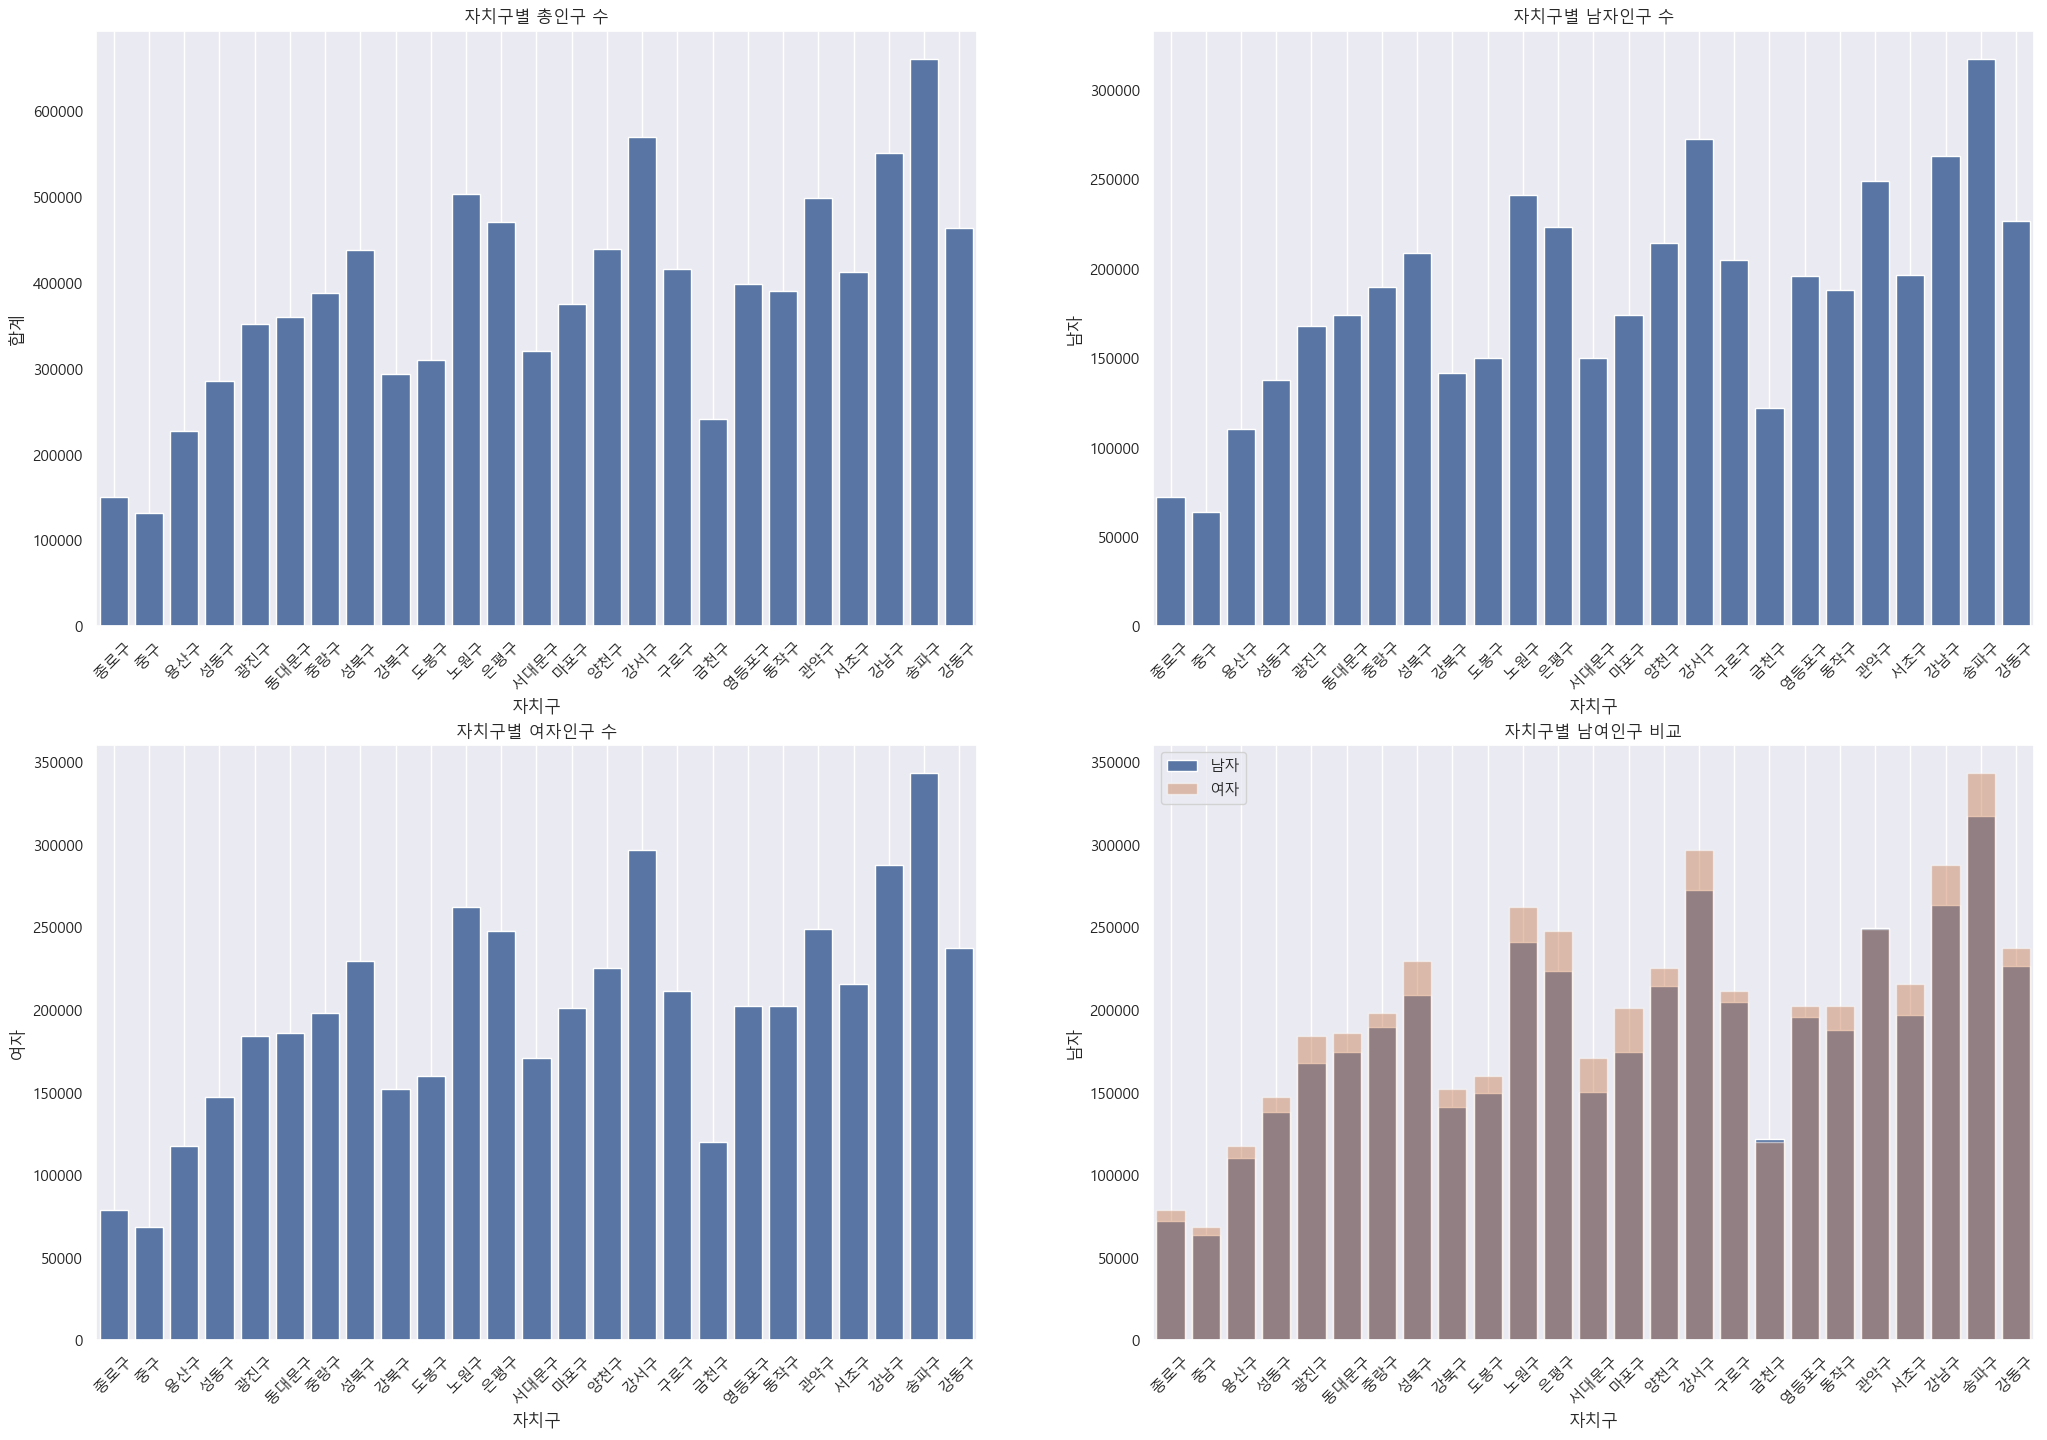

In [105]:
plt.figure(figsize=(25, 17))

plt.subplot(2, 2, 1)
plt.title('자치구별 총인구 수')
sns.barplot(x='자치구', y='합계', data=seoul_peoples)
plt.xticks(rotation=45)
plt.grid()

plt.subplot(2, 2, 2)
plt.title('자치구별 남자인구 수')
sns.barplot(x='자치구', y='남자', data=seoul_peoples)
plt.xticks(rotation=45)
plt.grid()

plt.subplot(2, 2, 3)
plt.title('자치구별 여자인구 수')
sns.barplot(x='자치구', y='여자', data=seoul_peoples)
plt.xticks(rotation=45)
plt.grid()

plt.subplot(2, 2, 4)
plt.title('자치구별 남여인구 비교')
sns.barplot(x='자치구', y='남자', data=seoul_peoples, label='남자')
sns.barplot(x='자치구', y='여자', alpha=0.5, data=seoul_peoples, label='여자')
plt.xticks(rotation=45)
plt.legend()
plt.grid()


plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 총 인구수, 남자의 수, 여자의 수가 가장 많은 지역은 송파구다 (강남구와 가까우며 강남3구에 포함되어 있고 문화시설이 많음)
# 2. 구별로 대체적으로 여자 인구가 많음 (아마 딸을 선호해서?) (공장일 및 3D업종은 대부분 남성이 하고 이 직업은 지방에 많아 여자가 더 많은 것 같음)
# 3.

---